## Roc curve vs Precision-Recall curves

### Roc curve

In [7]:
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score, auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

AUC for LR model is: 0.945
AUC for no-skill model is: 0.500


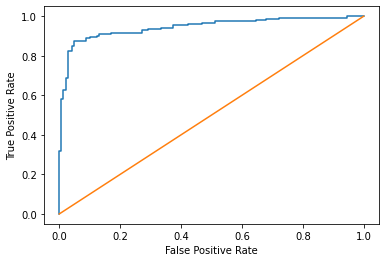

In [24]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=2)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LogisticRegression()
model.fit(x_train, y_train)
lr_probs = model.predict_proba(x_test)[:,1] # only for class 1 which is the positive class
no_skill_probs = [0 for _ in y_test]

preds = model.predict(x_test)

lr_auc = roc_auc_score(y_test, lr_probs)
no_skill_auc = roc_auc_score(y_test, no_skill_probs)

print("AUC for LR model is: %.3f"%(lr_auc))
print("AUC for no-skill model is: %.3f" %(no_skill_auc))

fpr, tpr, threshold = roc_curve(y_test, lr_probs)
fpr_no, tpr_no, threshold_no = roc_curve(y_test, no_skill_probs)

plt.plot(fpr, tpr)
plt.plot(fpr_no, tpr_no)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Precision-Recall curve

f1-score is: 0.894736842105263
auc-score is 0.9552175959055597


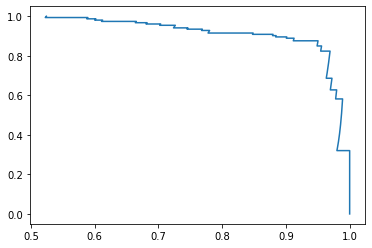

In [30]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
no_precision, no_recall, _ = precision_recall_curve(y_test, no_skill_probs)
f1 = f1_score(preds, y_test)
print(f"f1-score is: {f1}")
acu_score = auc(lr_recall,lr_precision)
print(f"auc-score is {acu_score}")

plt.plot(lr_precision, lr_recall)
plt.show()